In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 5
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [20]:
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [21]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = 1/(1+np.exp(-Z2))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [22]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1]

    logprobs = np.sum(np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2)))
    cost = -(1/m)*logprobs
    
    cost = float(np.squeeze(cost))  
    
    return cost

In [23]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2-Y
    dW2 = (1/m)*(np.dot(dZ2,A1.T))
    db2 = (1/m)*(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [24]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [25]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x,n_h,n_y)


    for i in range(0, num_iterations):

        A2, cache = forward_propagation(X,parameters)
        
        cost = compute_cost(A2,Y,parameters)

        grads = backward_propagation(parameters,cache,X,Y)

        parameters = update_parameters(parameters,grads)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [26]:
# training data

x_train = np.array([

    [0, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 1, 1, 0, 1],
    [0, 1, 1, 1, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 1, 0],

    [1, 0, 1, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 1],
    [0, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 0, 1, 0],

    [0, 1, 1, 0, 0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 1, 1, 1 ,1],
    [1, 1, 1, 0, 0, 1, 1, 0, 0],
    [1, 0, 1, 1, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0, 1, 1, 1],

    [0, 1, 0, 0, 0, 1, 1, 1, 1],
    [1, 0, 0, 1, 0, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0, 1, 0, 1, 1],
    [1, 1, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 0],

    [0, 0, 1, 1, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 1, 1, 1, 0],
    [1, 0, 0, 1, 0, 1, 0, 1, 1],
    [1, 1, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 1, 0, 1, 1],

    [0, 1, 1, 0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 1, 1, 0],
    [1, 1, 1, 0, 0, 0, 0, 1, 1],
    [0, 0, 1, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 0, 0, 1],
    [1, 0, 1, 1, 0, 1, 1, 0, 0],

    [0, 0, 0, 1, 0, 1, 1, 1, 1],
    [1, 1, 0, 1, 0, 0, 1, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 0, 1, 1, 1, 0],
    [1, 1, 0, 1, 0, 1, 0, 1, 1]

])
print((x_train.T).shape)

y_train = np.array([

    [1], 
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [1],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [0]
])

parameters = nn_model(x_train.T, y_train.T, 5, num_iterations=10000, print_cost=True)

(9, 56)
Cost after iteration 0: 0.693230
Cost after iteration 1000: 0.017201
Cost after iteration 2000: 0.004105
Cost after iteration 3000: 0.002220
Cost after iteration 4000: 0.001498
Cost after iteration 5000: 0.001125
Cost after iteration 6000: 0.000899
Cost after iteration 7000: 0.000747
Cost after iteration 8000: 0.000639
Cost after iteration 9000: 0.000559


In [27]:
def predict(parameters, X):
   
    A2, cache = forward_propagation(X,parameters)
    predictions = np.round(A2)==1
    return predictions

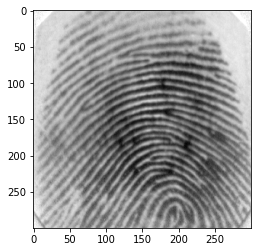

In [28]:
import cv2
img=cv2.imread('./101_1.tif',0)
plt.imshow(img, cmap='gray')

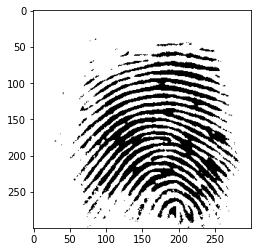

In [29]:
bin_image = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
plt.imshow(bin_image[1], cmap='gray')

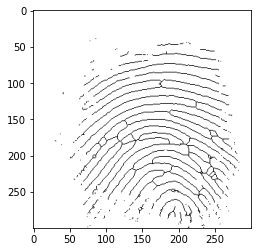

In [30]:
from preprocessing.thinning import skeletonize
thin = skeletonize(bin_image[1])
plt.imshow(thin, cmap='gray')

In [31]:
feature_locations = []

for i in range(0,297,3):
  for j in range(0,297,3):
    x=[]
    for m in range(3):
      for n in range(3):
        val = thin[i+m][j+n]
        if val == 255:
          x.append(1)
        else:
          x.append(0)
    x=np.array(x)
    x=x.reshape(-1,1)
    prediction = predict(parameters, x)
    if (prediction == True):
      feature_locations.append([i+1, j+1])
    
print(len(feature_locations))

115


In [32]:
def euclidean(a, b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

for i in range(5):
    for i in feature_locations:
        for j in feature_locations:
            if (euclidean(i,j)<15 and i!=j):
                feature_locations.remove(j)
                break
        
print(feature_locations)
print(len(feature_locations))

[[55, 238], [94, 232], [100, 175], [100, 208], [112, 253], [121, 208], [127, 262], [139, 199], [139, 235], [154, 193], [154, 217], [157, 130], [172, 136], [172, 211], [175, 79], [175, 97], [175, 256], [184, 187], [184, 238], [187, 121], [196, 88], [196, 199], [211, 175], [211, 274], [217, 121], [217, 190], [223, 79], [223, 232], [226, 103], [226, 139], [226, 250], [238, 118], [238, 217], [247, 190], [250, 250], [253, 133], [253, 265], [256, 175], [259, 103], [262, 220], [268, 151], [277, 193], [277, 229], [280, 175], [280, 253], [286, 217], [295, 235]]
47


In [33]:
for i in feature_locations:
    cv2.circle(thin, (i[1],i[0]), 3, (0,0,255))

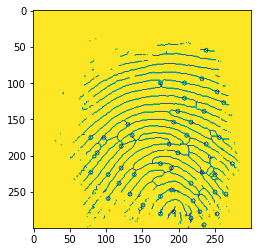

In [34]:
plt.imshow(thin)